    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Parameter: 
w0: 58.771920
w1: 0.000000
w2: -0.494414
MSE: 18.916198
Parameter: 
w0: 57.951904
w1: 0.000000
w2: -0.481820
MSE: 22.783182
Parameter: 
w0: 56.997111
w1: 0.000000
w2: -0.467945
MSE: 15.620123
Parameter: 
w0: 55.229061
w1: 0.000000
w2: -0.442320
MSE: 16.209680
Parameter: 
w0: 56.092200
w1: 0.000000
w2: -0.452319
MSE: 23.002222
MSE (Average): 19.306281


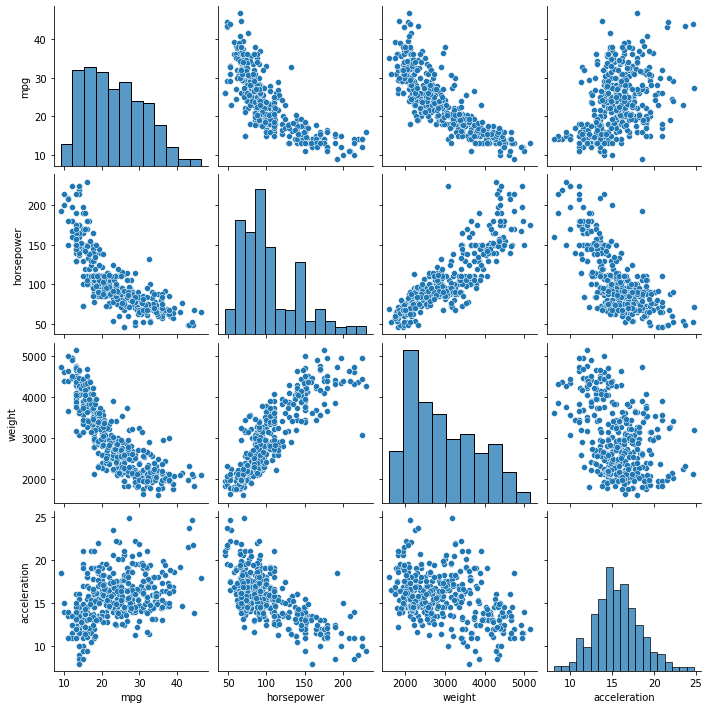

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, preprocessing, metrics, model_selection

### download the original data set -- it has a bunch of NaN's)
#cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None, sep='\s+')

### Clean data set
cars = pd.read_csv('auto-mpg.data.txt',header=None, sep='\s+')

### Label columns
cars.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
print (cars.head())

### Some scatter plots
cols = ['mpg', 'horsepower', 'weight', 'acceleration']
sns.pairplot(cars[cols], size=2.5)
#plt.show()

### extract the fuel consumption
y = cars.iloc[:,0].values

### horsepower
X = cars.iloc[:,[3]].values

# Compute Polynomial Features (e.g., horsepower^2)
poly = preprocessing.PolynomialFeatures(2)
X= poly.fit_transform(X)

#5-fold Cross-validation
kf = model_selection.KFold(n_splits=5, shuffle=True)
mses = []
for train_index, test_index in kf.split(X):
    
    #Split into training and test data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Linear regression
    reg = linear_model.LinearRegression()
    reg.fit(X_train,y_train)
    
    #Print Parameters
    print("Parameter: ")
    print('w0: %f' %reg.intercept_)
    print('w1: %f' %reg.coef_[0])
    print('w2: %f' %reg.coef_[1])

    # MSE 
    mse = sum((y_test - reg.predict(X_test))**2.0)/len(y_test)
    print("MSE: %f" %mse)
    mses.append(mse)
    
print("MSE (Average): %f" %(sum(mses)/len(mses)))